In [ ]:
# Bit collision
# https://sourceforge.net/p/rdkit/mailman/message/36438523/
# https://github.com/rdkit/rdkit/discussions/4688
# https://github.com/rdkit/rdkit/discussions/4688
# https://www.mail-archive.com/rdkit-discuss@lists.sourceforge.net/msg08341.html

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps
import pandas as pd

from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem import rdmolops
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from io import BytesIO

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400

In [2]:
# http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html
# https://sourceforge.net/p/rdkit/mailman/message/36011548/

#mol = Chem.MolFromSmiles('CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O')
#mol = Chem.MolFromSmiles(r'CN(C)[C@@H]1C(=O)/C(=C(\N)O)C(=O)[C@@]2(O)C(=O)C3=C(O)c4c(O)cccc4[C@@](C)(O)[C@H]3C[C@@H]12')
#mol = Chem.MolFromSmiles(r'CC(=O)O[C@@H]1[C@@H](SC2=CC=CC=C2N(C1=O)CCN(C)C)C3=CC=C(C=C3)OC')
#mol = Chem.MolFromSmiles(r'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O')
#mol = Chem.MolFromSmiles(r'O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O')
mol = Chem.MolFromSmiles(r'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21')
#Draw.MolToFile(mol,'mol.png', size=(600, 600))
d2d = rdMolDraw2D.MolDraw2DCairo(600,600)
#d2d = rdMolDraw2D.MolDraw2DSVG(600,600)
opts = d2d.drawOptions()
opts.clearBackground=False
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
#SVG(d2d.GetDrawingText())
# with open('mol.png','wb') as f:
#     f.write(d2d.GetDrawingText())

In [13]:
mol = Chem.MolFromSmiles('CN/C(=C\[N+](=O)[O-])/NCCSCC1=CSC(=N1)CN(C)C') # [OH-], OC([*])=O

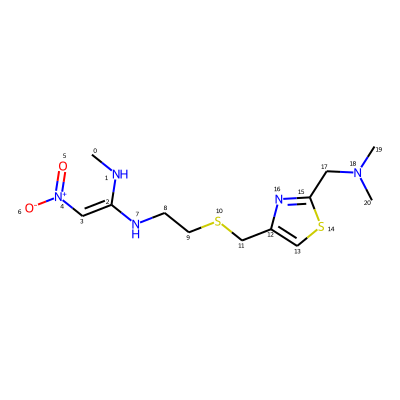

In [14]:
mol

In [32]:
mol = Chem.AddHs(mol, addCoords=True)

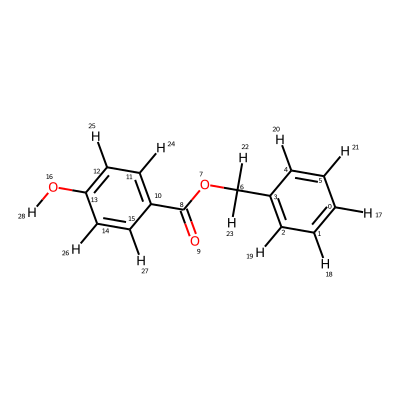

In [33]:
mol

In [72]:
bi = {}
#fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048, bitInfo=bi)
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=16384, bitInfo=bi, useFeatures=False) # radius = 2, 4, 6 <-
onbits = list(fp.GetOnBits())[:]
# show 10 of the set bits:
#onbits = list(fp.GetOnBits())[:]

In [73]:
print(onbits)
print(bi)

[41, 279, 932, 1076, 1917, 2790, 3087, 3798, 4029, 5402, 5476, 5487, 6224, 6438, 6486, 7201, 7296, 7866, 8017, 8108, 8460, 11047, 11121, 11738, 12056, 12239, 12527, 13376, 13461, 13478, 13753, 13773, 14019, 14587, 14717, 14986, 15737]
{41: ((6, 1),), 279: ((2, 2),), 932: ((1, 1), (3, 1)), 1076: ((9, 2),), 1917: ((7, 1),), 2790: ((6, 3),), 3087: ((13, 2),), 3798: ((12, 1), (14, 1)), 4029: ((1, 2), (3, 2)), 5402: ((9, 3),), 5476: ((9, 0), (10, 0), (15, 0)), 5487: ((10, 1), (15, 1)), 6224: ((1, 0), (3, 0), (5, 0)), 6438: ((0, 1), (4, 1)), 6486: ((5, 3),), 7201: ((0, 0), (4, 0), (11, 0), (16, 0)), 7296: ((8, 0),), 7866: ((11, 1), (16, 1)), 8017: ((12, 0), (13, 0), (14, 0)), 8108: ((8, 3),), 8460: ((6, 2),), 11047: ((6, 0),), 11121: ((2, 0),), 11738: ((5, 2),), 12056: ((8, 1),), 12239: ((12, 2), (14, 2)), 12527: ((2, 3),), 13376: ((13, 1),), 13461: ((13, 3),), 13478: ((5, 1),), 13753: ((12, 3), (14, 3)), 13773: ((10, 2), (15, 2)), 14019: ((8, 2),), 14587: ((2, 1),), 14717: ((9, 1),), 14986:

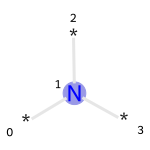

In [74]:
Draw.DrawMorganBit(mol, 11121, bi)

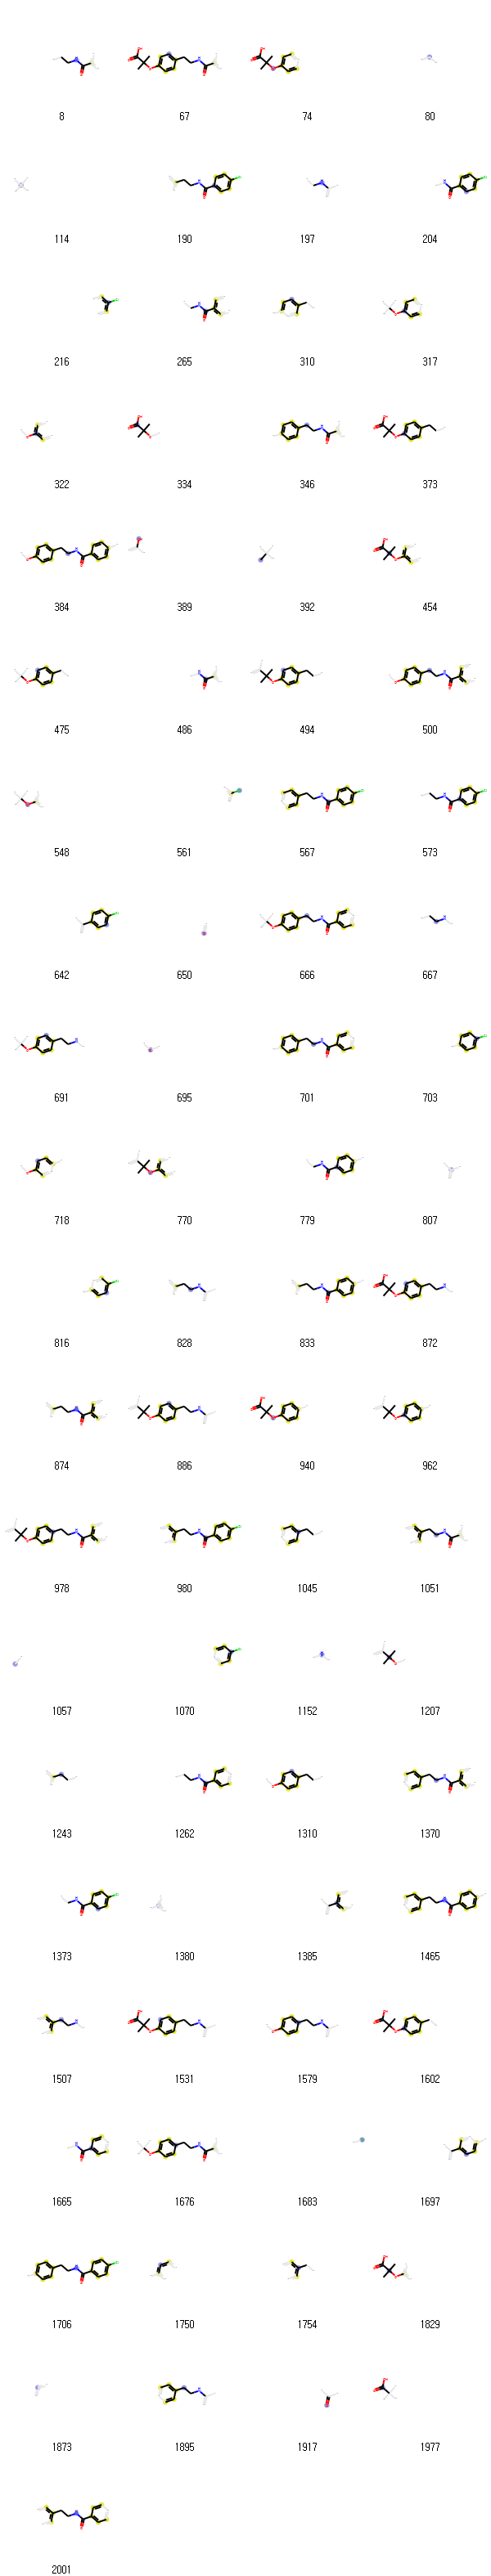

In [9]:
tpls = [(mol,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:])

In [10]:
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

In [12]:
interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(mol),
         bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(8, 67, 74, 80, 114, 190, 197, 204, 216, 265, 310…

In [139]:
mol = Chem.MolFromSmiles('CCN(CC)CCOC(=O)C1=CC=C(C=C1)N')

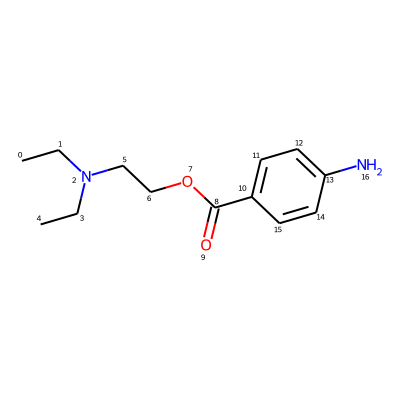

In [140]:
mol

In [164]:
mol = Chem.AddHs(mol, addCoords=True)

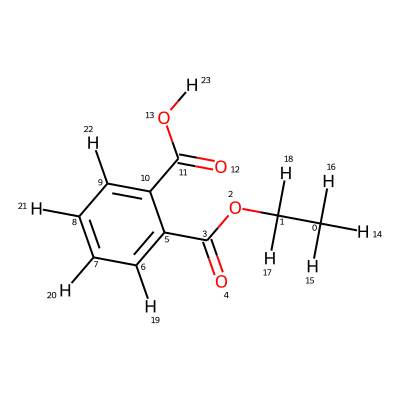

In [165]:
mol

In [141]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, fpSize=32768, minPath=1, maxPath=3, bitInfo=rdkbi)
# show 10 of the set bits:
print(list(rdkfp.GetOnBits())[:])

[166, 786, 1075, 1105, 1270, 1339, 2890, 3025, 3026, 3087, 4426, 4840, 5070, 5404, 6265, 6421, 7074, 8085, 8958, 9964, 10174, 10310, 10938, 11785, 12056, 12400, 13172, 14029, 14195, 14335, 14743, 16703, 17375, 17466, 18112, 18994, 19005, 19192, 19492, 19665, 19928, 21005, 22940, 23116, 23664, 23694, 24302, 26360, 26647, 26918, 27005, 27518, 27673, 28533, 29855, 30881, 31028, 31574, 31649, 31746, 32083, 32680]


In [142]:
print(rdkfp.GetNumOnBits(),len(rdkbi))

62 62


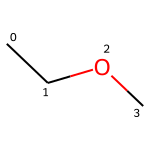

In [143]:
Draw.DrawRDKitBit(mol, 31028, rdkbi)

In [55]:
tpls = [(epinephrine,x,rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(tpls[:],molsPerRow=4,legends=[str(x) for x in rdkbi][:])

NameError: name 'epinephrine' is not defined

In [29]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(93, 103, 112, 122, 148, 149, 161, 166, 194, 208,…

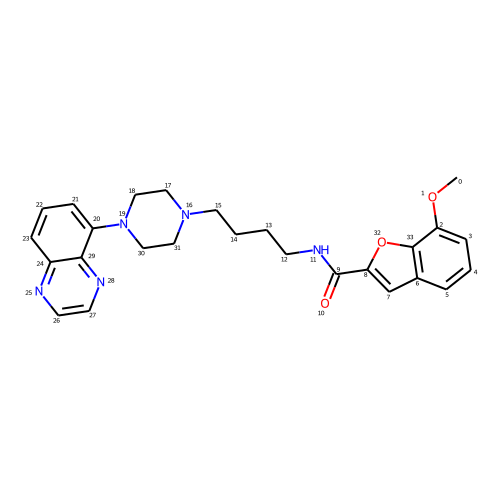

In [2]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
mol

In [5]:
fp = rdmolops.PatternFingerprint(mol, fpSize=2048)

In [ ]:
Draw.DrawRDKitBit(mol, 1075, rdkbi)

In [31]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

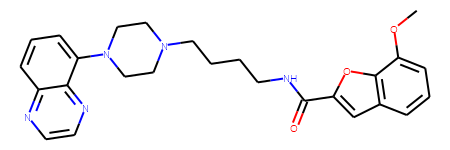

In [33]:
mol

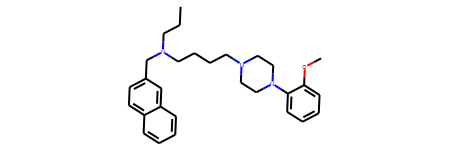

In [34]:
refmol

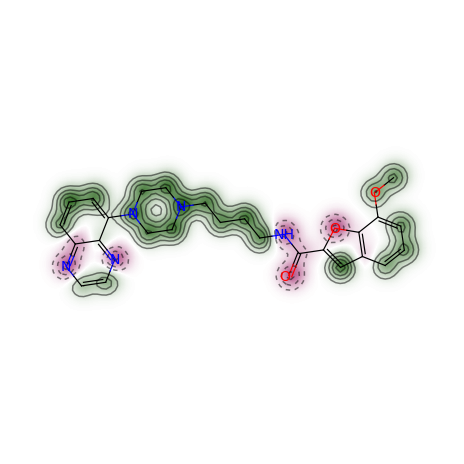

In [35]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetAPFingerprint)

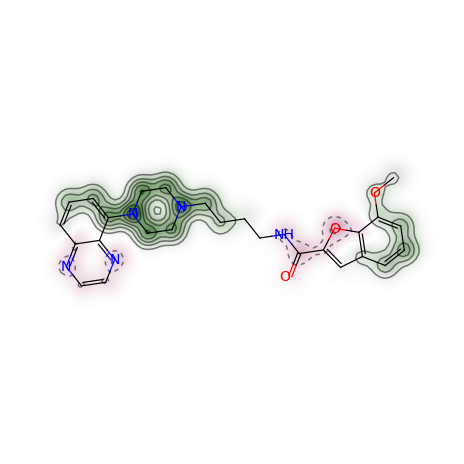

In [36]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetTTFingerprint)

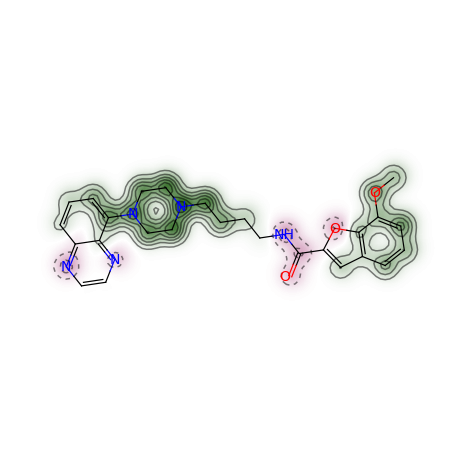

In [43]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

In [3]:
df_smiles = pd.read_csv('new_list_2.csv', index_col='no')

In [12]:
mol = Chem.MolFromMolFile('PA_repeating_unit.mol')

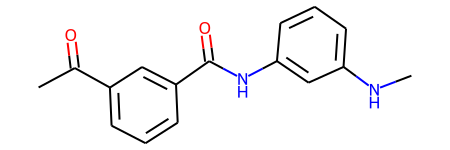

In [13]:
mol

In [15]:
contribs

[-0.0009061885650943273,
 0.15932353688985137,
 -0.2945117932631623,
 0.01798379649516074,
 -0.05138081158316227,
 -0.06075019104733049,
 -0.04940428473031574,
 0.04038753087263626,
 -0.038618193238195125,
 0.25518284656090173,
 -0.3219204139543409,
 -0.2689295164986743,
 0.04303887526326715,
 -0.015267998167172937,
 0.03579188102445311,
 -0.03882207743198074,
 -0.05814725767284256,
 -0.03837247050082086,
 -0.3880602432478721,
 0.0033162466191789925]

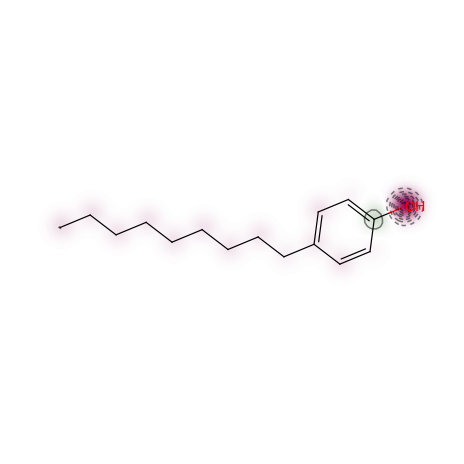

In [3]:
#mol = Chem.MolFromSmiles(df_smiles['SMILES'].iloc[164])
#mol = Chem.MolFromMolFile('PA_repeating_unit.mol')
mol = Chem.MolFromSmiles('CCCCCCCCCC1=CC=C(C=C1)O')
d2d = rdMolDraw2D.MolDraw2DCairo(700,700)
opts = d2d.drawOptions()
opts.clearBackground = True

AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10)#, draw2d=d2d)

opts = d2d.drawOptions()
opts.clearBackground = True

#d2d.ClearDrawing()
d2d.FinishDrawing()
# #SVG(d2d.GetDrawingText())
# with open('mol_charge.png','wb') as f:
#     f.write(d2d.GetDrawingText())

In [ ]:
# Bit collision counts

In [2]:
df_smiles = pd.read_csv('new_list_2.csv', index_col='no')

In [164]:
fp1 = rdmd.GetMorganFingerprint(mol, 1)
print(fp1)
print(fp2)

In [25]:
count = 0
for i in range(len(df_smiles)):
    txt = df_smiles['SMILES'].iloc[i]
    mol = Chem.MolFromSmiles(txt)
    fp1 = rdmd.GetMorganFingerprint(mol, 3)
    a = len(fp1.GetNonzeroElements())
    fp2 = rdmd.GetMorganFingerprintAsBitVect(mol, 3, 16384) # radius z= 2, 4, 6 <-
    b = fp2.GetNumOnBits()
    diff = a-b
    if diff != 0:
        count = count + 1
    print(a, b, diff)
print(count)

24 24 0
24 24 0
22 22 0
3 3 0
6 6 0
3 3 0
6 6 0
62 62 0
16 16 0
26 26 0
34 34 0
34 34 0
31 31 0
44 44 0
50 50 0
32 32 0
13 13 0
9 9 0
14 14 0
15 15 0
24 24 0
13 13 0
42 42 0
4 4 0
74 74 0
69 69 0
37 37 0
40 40 0
8 8 0
17 17 0
6 6 0
5 5 0
23 23 0
14 14 0
26 26 0
21 21 0
35 35 0
32 32 0
11 11 0
37 37 0
48 48 0
56 56 0
37 37 0
34 34 0
32 32 0
62 62 0
66 66 0
43 43 0
47 47 0
42 42 0
47 47 0
42 42 0
53 53 0
32 32 0
50 50 0
52 52 0
42 42 0
40 40 0
33 33 0
44 44 0
4 4 0
4 4 0
4 4 0
11 11 0
5 5 0
8 8 0
56 56 0
41 41 0
29 29 0
57 57 0
26 26 0
58 58 0
14 14 0
36 36 0
26 26 0
38 38 0
40 40 0
34 34 0
11 11 0
13 13 0
13 13 0
11 11 0
13 13 0
11 11 0
10 10 0
9 9 0
56 56 0
43 43 0
11 11 0
21 21 0
17 17 0
20 20 0
24 24 0
22 22 0
23 23 0
24 24 0
24 24 0
24 24 0
34 33 1
60 60 0
59 59 0
51 51 0
41 41 0
41 41 0
44 44 0
41 40 1
57 57 0
40 40 0
36 36 0
52 52 0
24 24 0
13 13 0
19 19 0
17 17 0
52 52 0
13 13 0
14 14 0
68 68 0
6 6 0
24 24 0
14 14 0
10 10 0
21 21 0
46 46 0
42 42 0
19 19 0
44 44 0
68 68 0
13 13 0


In [22]:
c = 0
for i in range(len(df_smiles)):
    txt = df_smiles['SMILES'].iloc[i]
    mol = Chem.MolFromSmiles(txt)
    fp = rdmolops.RDKFingerprint(mol, minPath=1, maxPath=1, fpSize=512)
    #a = len(bi)
    b = fp.GetNumOnBits()
    #diff = a-b
    #if diff != 0:
    #    c = c + 1
    print(b)
#print(c)

4
6
10
2
4
2
4
12
6
12
10
8
12
14
23
10
8
6
8
8
10
4
16
2
10
8
12
14
6
6
4
4
6
4
4
8
10
14
8
17
14
16
14
14
12
21
16
12
12
10
12
12
12
13
10
12
12
17
12
11
2
2
2
8
4
4
18
14
13
10
10
10
6
17
12
11
12
6
8
10
10
8
10
8
4
4
4
4
8
4
8
10
8
8
10
8
8
8
10
12
10
16
10
15
12
16
10
16
12
16
10
4
8
6
13
4
6
18
4
4
4
4
8
14
4
8
9
20
4
4
10
12
12
16
16
17
16
6
15
10
6
14
10
14
6
8
14
4
4
4
4
6
2
2
8
10
10
6
13
20
15
10
19
6
10
4
12
10
14
6
10
6
12
9
8
8
14
20
13
8
12
16
8
14
15
12
12
10
10
21
22
10
4
4
13
8
4
4
4
4
4
10
16
20
8
10
8
8
6
6
10
10
10
10
14
14
13
15
12
14
14
14
10
19
14
16
20
8
12


In [204]:
fp = Chem.RDKFingerprint(mol, minPath=1, maxPath=5, fpSize=1048, bitInfo=bi)
b = fp.GetNumOnBits()

In [205]:
print(len(bi))
print(b)

2058
286


In [213]:

count = 0
for i in range(len(df_smiles)):
    txt = df_smiles['SMILES'].iloc[i]
    mol = Chem.MolFromSmiles(txt)
    fp1 = rdmd.GetHashedAtomPairFingerprint(mol)
    a = len(fp1.GetNonzeroElements())
    fp2 = rdmd.GetHashedAtomPairFingerprintAsBitVect(mol)
    b = fp2.GetNumOnBits()
    diff = a-b
    if diff != 0:
        count = count + 1
    print(a, b, diff)
print(count)

31 46 -15
15 25 -10
36 36 0
1 1 0
4 6 -2
1 1 0
4 6 -2
132 186 -54
15 26 -11
35 53 -18
42 72 -30
50 79 -29
32 80 -48
76 137 -61
107 177 -70
60 93 -33
13 21 -8
7 10 -3
15 15 0
11 19 -8
74 165 -91
10 19 -9
76 112 -36
2 4 -2
207 307 -100
156 251 -95
64 120 -56
73 119 -46
6 6 0
15 26 -11
3 3 0
3 5 -2
42 55 -13
18 37 -19
21 39 -18
37 98 -61
50 99 -49
50 73 -23
11 16 -5
57 108 -51
109 155 -46
154 239 -85
68 112 -44
43 78 -35
54 84 -30
139 218 -79
179 330 -151
72 116 -44
105 142 -37
76 125 -49
101 153 -52
75 112 -37
94 137 -43
43 76 -33
87 135 -48
115 165 -50
76 112 -36
88 137 -49
55 93 -38
95 170 -75
2 4 -2
2 6 -4
2 6 -4
11 15 -4
5 12 -7
7 10 -3
105 139 -34
73 119 -46
40 77 -37
100 152 -52
29 46 -17
106 152 -46
19 35 -16
54 64 -10
41 93 -52
57 112 -55
72 136 -64
60 106 -46
10 10 0
15 15 0
16 21 -5
10 10 0
16 21 -5
11 15 -4
13 25 -12
9 15 -6
120 289 -169
68 157 -89
11 16 -5
22 37 -15
29 53 -24
39 84 -45
81 163 -82
47 92 -45
57 126 -69
72 146 -74
65 129 -64
56 112 -56
51 82 -31
107 156 -49
100 

In [211]:
fp = rdmd.GetHashedTopologicalTorsionFingerprint(mol)
a = len(fp.GetNonzeroElements())
fp = rdmd.GetHashedTopologicalTorsionFingerprintAsBitVect(mol)
b = fp.GetNumOnBits()
print(a, b)

76 101
